In [1]:
# 2. Linear regression with one variable
## import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## set work directory
os.chdir('C:\\Users\\gdong\\Desktop\\ML -AN\\Assignments\ex1\\')
os.getcwd()

'C:\\Users\\gdong\\Desktop\\ML -AN\\Assignments\\ex1'

In [2]:
## read data
dat = pd.read_table('./ex1data1.txt', sep = ',', names=('Population', 'Profit'))
dat.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


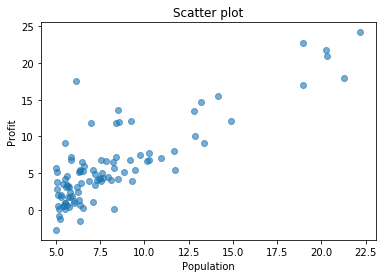

In [3]:
# 2.1 Plotting the Data
x, y = dat['Population'],dat['Profit']
plt.scatter(x, y,alpha=0.6)
plt.title('Scatter plot')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.show()

In [4]:
# 2.2 Gradient Descent
## parameters
m = len(y)
iterations = 1500
alpha = 0.01
theta = np.zeros(2).reshape(2,1)
X = np.array([np.ones(m),np.array(x)])
Y = np.array(y)

In [5]:
## functions
def hypo(theta):
    hypo = np.matmul(np.transpose(theta),X)
    return hypo

def computeCost(theta):
    J = 1/(2*m)*(np.sum(pow(hypo(theta)-Y,2)))
    return J

print('The initial Cost is ' + str(computeCost(theta)))

The initial Cost is 32.072733877455676


In [6]:
## iterations
theta = np.zeros(2).reshape(2,1)
costTrend = []
thetaTrend = [[] for i in range(iterations)]
for i in range(iterations):
    theta[0] = theta[0] - alpha/m*(np.sum((hypo(theta)-Y)*X[0,:]))
    theta[1] = theta[1] - alpha/m*(np.sum((hypo(theta)-Y)*X[1,:]))     
    costTrend.append(computeCost(theta))
    for j in range(2):
        thetaTrend[i].append(theta[j][0])

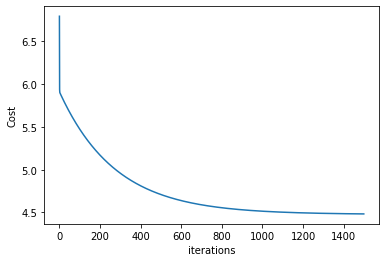

In [7]:
## plot cost values as iteration changes
plt.plot(costTrend)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.show()

In [8]:
## prediction
def pred(theta,x):
    y_pred = np.matmul(np.transpose(theta),x)
    return y_pred

print('predicted profit for area 35000 is ' + str(pred(theta,np.array([1,3.5]))[0]))
print('predicted profit for area 35000 is ' + str(pred(theta,np.array([1,7]))[0]))

predicted profit for area 35000 is 0.44839857809757566
predicted profit for area 35000 is 4.532860631674652


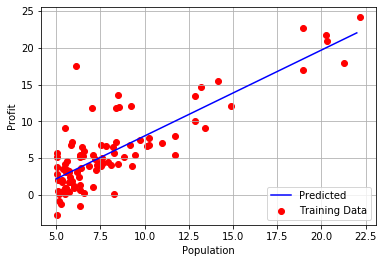

In [9]:
## model visualization
x_pred = np.linspace(5,22,200)
y_pred = theta[0] + theta[1]*x_pred
plt.scatter(x, y, c='red',label = 'Training Data')
plt.plot(x_pred, y_pred, c= "blue",label = 'Predicted')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend(loc='lower right')
plt.grid()
plt.show()

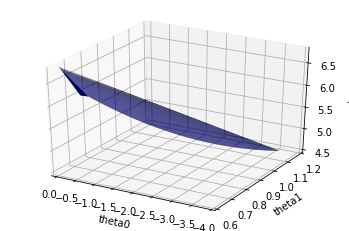

In [10]:
## visualize 3D J values
X_theta0 = np.array(thetaTrend)[:,0]
Y_theta1 = np.array(thetaTrend)[:,1]
Z_cost = np.array(costTrend)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_trisurf(X_theta0, Y_theta1, Z_cost, color='blue')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J')
plt.ylim(0.6, 1.2)
plt.xlim(0.05, -4)

plt.show()